Exercise 8.1: A low-pass filter

In [107]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

In [108]:
from scipy.integrate import solve_ivp

def rk4(f, x0, a, b, N=100):
    ''' Solves an ODE using fourth-order Runge-Kutta 
    f = function in f(t,x)
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    x = [x0]
    for t in np.arange(0,N-1,1): 
        k1 = h*f(ts[t], x[t]) 
        k2 = h*f(ts[t] + h/2, x[t] + k1/2) 
        k3 = h*f(ts[t] + h/2, x[t] + k2/2) 
        k4 = h*f(ts[t] + h, x[t] +k3) 
        x.append(x[t] + (k1+2*k2+2*k3+k4)/6) 
    return np.vstack((ts, x)).T
    

def rk2(f, x0, a, b, N=1000):
    ''' Solves an ODE using second-order Runge-Kutta 
    f = function in f(t,x)
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    x = [x0]
    for t in np.arange(0,N-1,1): 
        k1 = h*f(ts[t], x[t])
        k2 = h*f(ts[t] + h/2, x[t]+k1/2)
        x.append(x[t]+k2)
    return np.vstack((ts, x)).T

def em(f, x0, a, b, N=1000):
    ''' Solves an ODE using Euler Method
    f = function in f(t,x) 
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    xs = [x0]
    for t in np.arange(0,N-1,1): 
        xs.append(xs[t]+h*f(ts[t], xs[t]))
    return np.vstack((ts, xs)).T

def rk4_sim(f, r0, a, b, N=1000):
    ''' Solves an ODE system using fourth-order Runge-Kutta 
    f = vector function f(t,r)
    r0 = initial condition array
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    r=np.array([r0], float)
    for t in np.arange(0,N-1,1): 
        k1 = h*f(ts[t], r[t]) 
        k2 = h*f(ts[t] + h/2, r[t] + k1/2) 
        k3 = h*f(ts[t] + h/2, r[t] + k2/2) 
        k4 = h*f(ts[t] + h, r[t] + k3) 
        to_add = (r[t] + (k1+2*k2+2*k3+k4)/6).reshape(1,len(r0))
        r=np.append(r, to_add, axis=0)
    ts=ts.reshape(len(ts),1) 
    return np.hstack((ts, r))

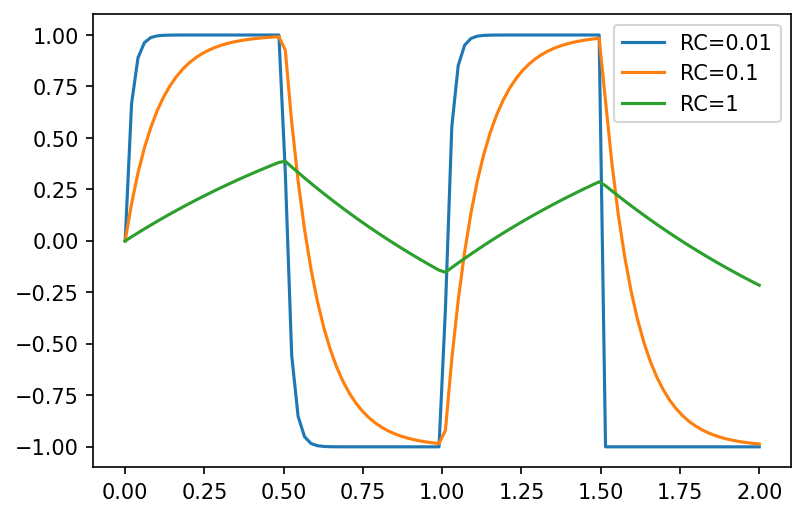

In [109]:
def signal(t):
    if np.floor(2*t)%2 == 0:
        return 1 
    if np.floor(2*t)%2 == 1: 
        return -1

plt.figure(dpi=150)
RC=[0.01, 0.1, 1]
for tau in RC: 
    f = lambda t,x : (signal(t) - x)/tau
    result=rk4(f, 0, 0, 2)
    plt.plot(result[0::, 0], result[0::,1],label = r'RC={}'.format(tau))
    plt.legend(loc='best')

Exercise 8.3: Lorenz Equations
$$\begin{align*}
\frac{\text{d} x}{\text{d} t} = \sigma(y-x), \qquad \frac{\text{d} y}{\text{d} t} = rx - y - xz, \qquad \frac{\text{d} z}{\text{d} t} = xy-bz
\end{align*}$$
Potential pitfall: Choose high enough N in your RK4 so values don't overshoot!

Text(0, 0.5, 'z')

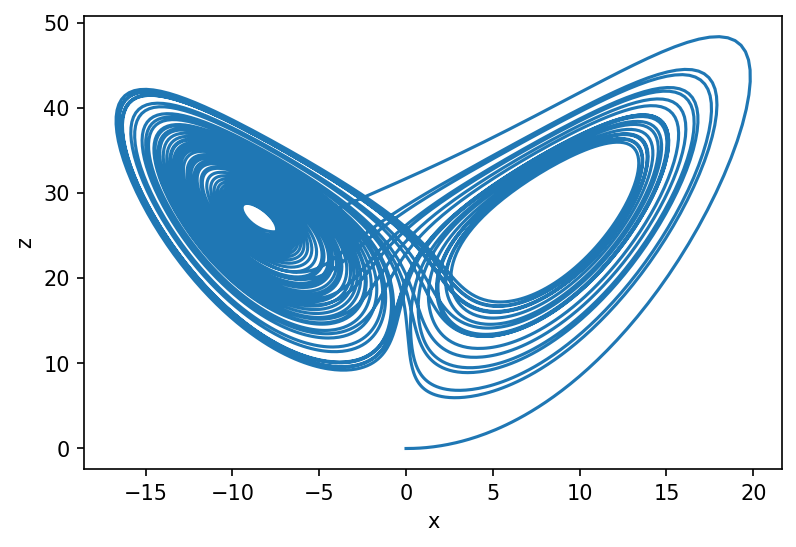

In [110]:
def g(t,r):
    x = r[0]
    y = r[1]
    z = r[2]
    sigma, r, b = 10, 28, 8/3
    fx = sigma*(y-x) 
    fy = r*x - y - x*z 
    fz = x*y - b*z 
    return np.array([fx,fy,fz],float)

init = [0,1,0]
result=rk4_sim(g, init, 0, 50, 10000)
result[~np.isnan(result).any(axis=1), :] #remove rows with NaN values
plt.figure(dpi=150)
plt.plot(result[:,1], result[:,3])
plt.xlabel('x')
plt.ylabel('z')

Text(0.5, 0, 'z')

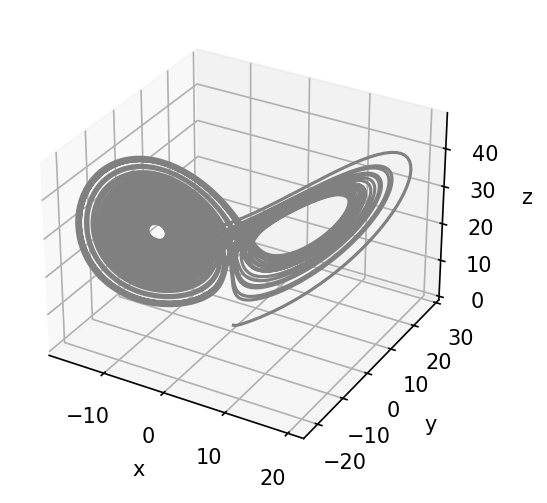

In [111]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d') 
ax.plot3D(result[:,1], result[:,2], result[:,3], 'gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Nonlinear Pendulum (Exercise 8.4)
$$\begin{align*}
\frac{\text{d}^2 \theta}{\text{d} t^2} = -\frac{g}{l}\sin \theta
\end{align*}$$
can be transformed into a system of linear ODEs
$$\begin{align*}
\frac{\text{d} \omega}{\text{d} t} = -\frac{g}{l}\sin \theta, \qquad \frac{\text{d} \theta}{\text{d} t} = \omega
\end{align*}$$

Text(0, 0.5, 'theta')

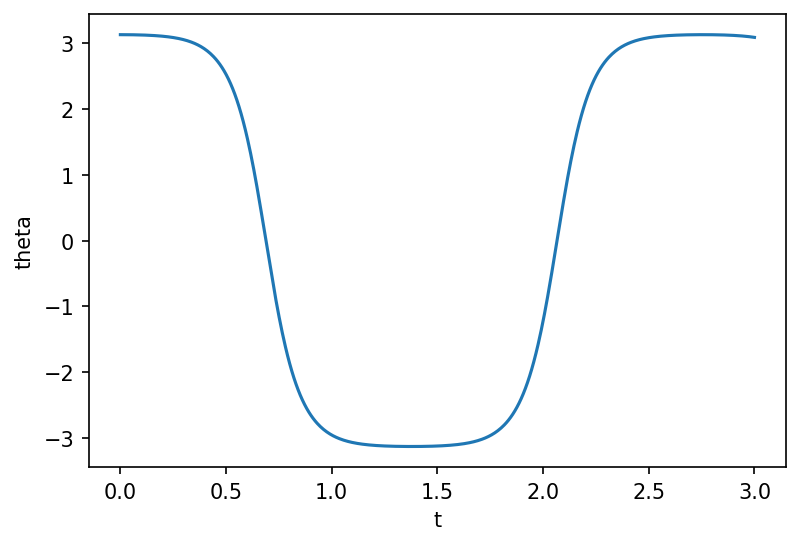

In [112]:
def pendulum(t,r):
    g,l = 9.81, 0.1
    omega, theta = r[0], r[1]
    fx = -(g/l)*np.sin(theta) 
    fy = omega 
    return np.array([fx,fy], float)

theta = 179.5
theta_rad = (theta/180)*np.pi
result=solve_ivp(pendulum, (0, 3), [0, theta_rad], 'RK45', vectorized=True, max_step=0.005)
plt.figure(dpi=150)
plt.plot(result.t, result.y[1])
plt.xlabel('t')
plt.ylabel('theta')

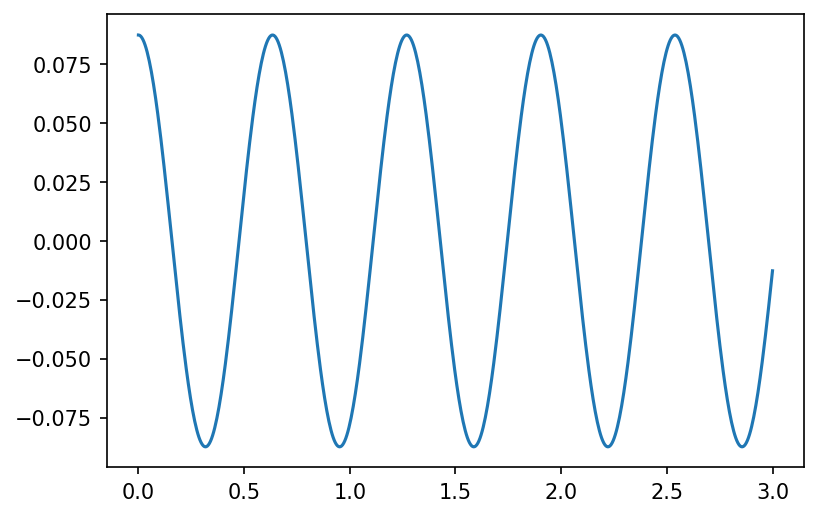

In [113]:
def pendulum(t,r):
    g,l = 9.81, 0.1
    omega, theta = r[0], r[1]
    fx = -(g/l)*np.sin(theta) 
    fy = omega 
    return np.array([fx,fy], float)

theta = 5
theta_rad = (theta/180)*np.pi
result=solve_ivp(pendulum, (0, 3), [0, theta_rad], 'RK45', vectorized=True, max_step=0.005)
plt.figure(dpi=150)
plt.plot(result.t, result.y[1])

Exercise 8.6: Harmonic and Anharmonic Oscillators

<Figure size 900x600 with 0 Axes>

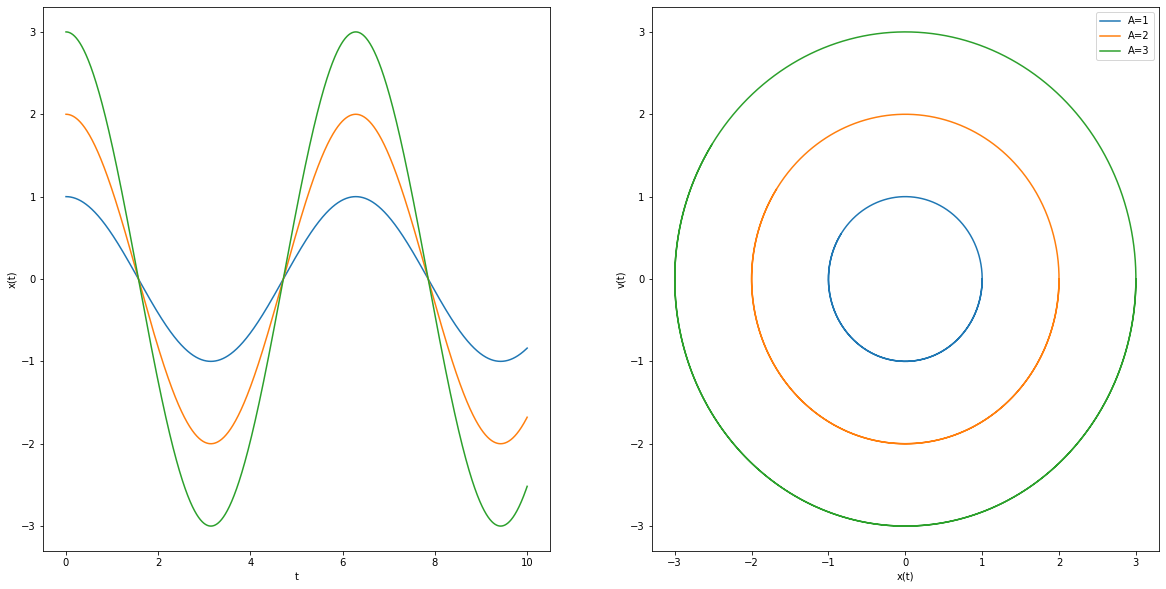

In [114]:
def shm(t,r, omega = 1):
    v,x = r[0], r[1]
    fv = -(omega**2)*x 
    fx = v 
    return np.array([fv,fx], float)

plt.figure(dpi=150)
fig, ax = plt.subplots(1,2, figsize=(20,10))
amplitudes = [1,2,3]
v=0
for x in amplitudes:
    result=solve_ivp(shm, (0, 10), [v,x], 'RK45', vectorized=True, max_step=0.005)
    ax[0].plot(result.t, result.y[1], label=r'A={}'.format(x))
    ax[1].plot(result.y[1], result.y[0], label=r'A={}'.format(x))
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x(t)')
    ax[1].set_xlabel('x(t)')
    ax[1].set_ylabel('v(t)')
plt.legend(loc='best')

<Figure size 900x600 with 0 Axes>

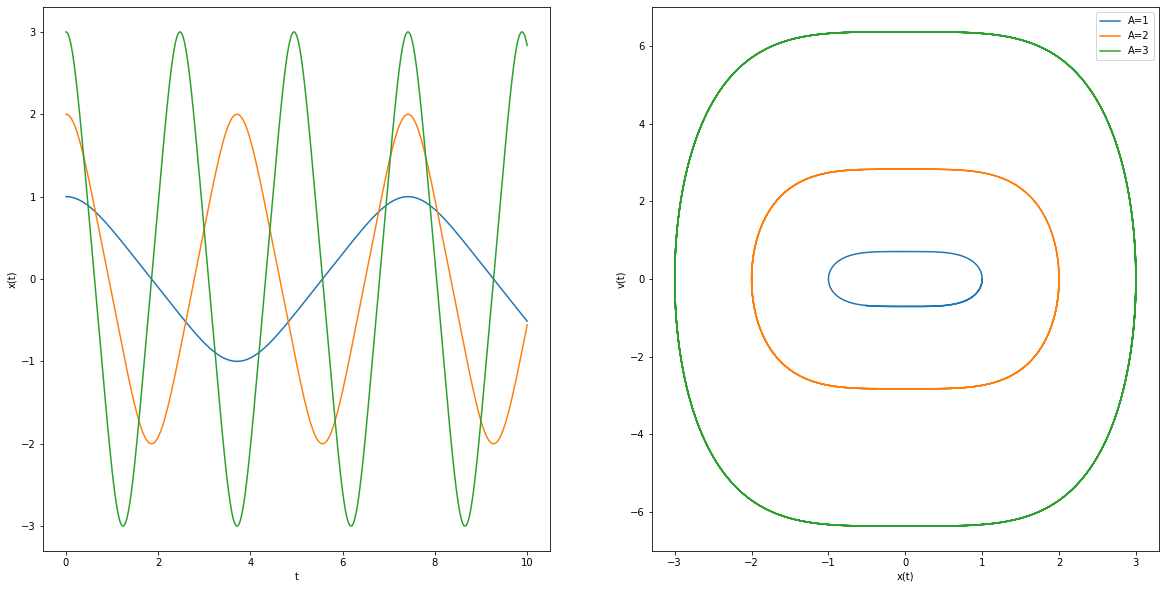

In [115]:
def g(t,r, omega = 1): #example of anharmonic motion
    v,x = r[0], r[1]
    fv = -(omega**2)*x**3 
    fx = v 
    return np.array([fv,fx], float)


plt.figure(dpi=150)
fig, ax = plt.subplots(1,2, figsize=(20,10))
amplitudes = [1,2,3]
v=0
for x in amplitudes:
    result=solve_ivp(g, (0, 10), [v,x], 'RK45', vectorized=True, max_step=0.005)
    ax[0].plot(result.t, result.y[1], label=r'A={}'.format(x))
    ax[1].plot(result.y[1], result.y[0], label=r'A={}'.format(x))
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x(t)')
    ax[1].set_xlabel('x(t)')
    ax[1].set_ylabel('v(t)')
plt.legend(loc='best')

<Figure size 900x600 with 0 Axes>

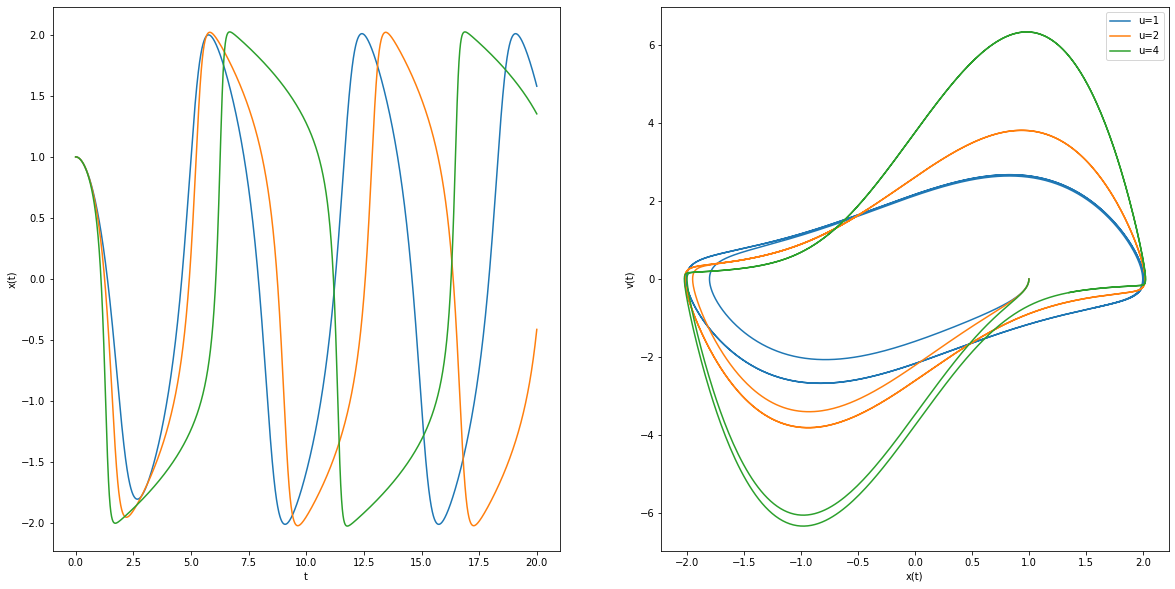

In [116]:
def vdp(t,r, omega = 1): #van der Pol oscillator
    v,x = r[0], r[1]
    fv = u*(1-x**2)*v - omega**2*x
    fx = v
    return np.array([fv,fx], float)


plt.figure(dpi=150)
fig, ax = plt.subplots(1,2, figsize=(20,10))
us = [1,2,4]
x,v = 1,0
for u in us:
    result=solve_ivp(vdp, (0, 20), [v,x], 'RK45', vectorized=True, max_step=0.005)
    ax[0].plot(result.t, result.y[1], label=r'u={}'.format(u))
    ax[1].plot(result.y[1], result.y[0], label=r'u={}'.format(u))
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x(t)')
    ax[1].set_xlabel('x(t)')
    ax[1].set_ylabel('v(t)')
plt.legend(loc='best')

# Boundary-Value Problems using Shooting Method

Example 8.8: Vertical Position of a Thrown Ball

In [195]:
from scipy.integrate import solve_ivp
g=9.81
def f(t,r):
    x,v = r[0], r[1]
    fv = -g 
    fx = v
    return np.array([fx, fv], float)

def height(v):
    # return rk4_sim(f, [0, v], 0.0, 10.0)[:,1][-1]
    return solve_ivp(f, (a,b), [0,v], 'RK45', vectorized=True).y[0][-1]

accuracy = 1e-5
a,b = 0.0,10.0
target = 10
v1, v2 = 0.01, 1000
h1, h2 = height(v1), height(v2)

while abs(h2-h1)> accuracy:
    vp = (v1+v2)/2
    hp = height(vp)
    if (h1-target)*(hp-target)>=0:
        v1, h1 = vp, hp
    else:
        v2, h2 = vp, hp
v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")


The required initial velocity is 50.050000299192014 m/s


C:\Users\Ron\AppData\Local\Temp/ipykernel_27420/4021795635.py:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([fx, fv], float)
